In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from  sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [26]:
df = pd.read_csv('/Users/victoroliveira/Desktop/vonix-py-statistic/src/vonixstatisc/data/pandas_data/data_fluency_queue_no_auto_dialer.csv')

df_to_dict = pd.DataFrame()
df_to_dict2 = pd.DataFrame()
df_to_dict3 = pd.DataFrame()
df_to_dict4 = pd.DataFrame()



df= df.dropna(axis=0)
df = df.loc[(df['handling_time'] > 10) & (df['handling_time'] <90) ]
df_march = df.loc[df['month'] == 'March']
df_queue = df.loc[df['queue_id'] == 'mgmsales']
df_agent = df.loc[df['agent_id'] == 1592]



In [27]:
df_to_dict['time'] = df['timestamp']
df_to_dict['ht'] = df['handling_time']
dict = df_to_dict.set_index('time').to_dict()['ht']

df_to_dict2['time'] = df_march['timestamp']
df_to_dict2['ht'] = df_march['handling_time']
dict2 = df_to_dict2.set_index('time').to_dict()['ht']

df_to_dict3['time'] = df_queue['timestamp']
df_to_dict3['ht'] = df_queue['handling_time']
dict3 = df_to_dict3.set_index('time').to_dict()['ht']

df_to_dict4['time'] = df_agent['timestamp']
df_to_dict4['ht'] = df_agent['handling_time']
dict4 = df_to_dict4.set_index('time').to_dict()['ht']



In [28]:
from datetime import datetime
from time import gmtime, strftime
import time
def transform_dict(data: dict, period: int) -> dict:
    """method that receives dict from database query
    {start_at(timestamp): talk_secs(seconds), ...} and create
    another dict based on the period (15, 30, 1hr) chosen
    {last_timestamp: [12,24,56,12, 90, 100], last_timestamp - period:[195,235,201,300], ... interval of three minutes for standard model}
    For standard model the data from the last period( 15 min, 30 min, 1h) is used to construct forecast for the next period so the return_dict begins with the last timestamp to the first
    """
    seconds = period * 60
    
    return_dict = {}

    keys_array = list(data.keys())
    beginning = keys_array[0]
    limit= beginning + seconds
    end = keys_array[-1]
    arr = []
    break_v = 1
    indice = 0
    while beginning < end:
        if break_v == beginning:
            break
        break_v = beginning
        for key, value in data.items():
            if key <= limit:
                arr.append(value)
                continue
        
            return_dict[f"{beginning}"] = arr
            indice += 1
            arr = []
            arr.append(value)
            beginning = key
            limit = beginning + seconds
            

    return return_dict

In [39]:
dict_transformed = transform_dict(dict,15)
mean_object = {i: np.mean(dict_transformed[i]) for i in dict_transformed.keys()}
call_volume = {i: len(dict_transformed[i]) for i in dict_transformed.keys()}
cv_object = {i: np.std(dict_transformed[i]) for i in dict_transformed.keys()}

dict_transformed2 = transform_dict(dict2,15)
mean_object2 = {i: np.mean(dict_transformed2[i]) for i in dict_transformed2.keys()}
call_volume2 = {i: len(dict_transformed2[i]) for i in dict_transformed2.keys()}
cv_object2 = {i: np.std(dict_transformed2[i]) for i in dict_transformed2.keys()}

dict_transformed3 = transform_dict(dict3,15)
mean_object3 = {i: np.mean(dict_transformed3[i]) for i in dict_transformed3.keys()}
call_volume3 = {i: len(dict_transformed3[i]) for i in dict_transformed3.keys()}
cv_object3 = {i: np.std(dict_transformed3[i]) for i in dict_transformed3.keys()}

dict_transformed4 = transform_dict(dict4,15)
mean_object4 = {i: np.mean(dict_transformed4[i]) for i in dict_transformed4.keys()}
call_volume4 = {i: len(dict_transformed4[i]) for i in dict_transformed4.keys()}
cv_object4 = {i: np.std(dict_transformed4[i]) for i in dict_transformed4.keys()}


In [40]:
df_to_ml = pd.DataFrame()
df_to_ml['call_volume'] = call_volume.values()
df_to_ml['cv'] = cv_object.values()
df_to_ml['mean'] = mean_object.values()

df_to_ml2 = pd.DataFrame()
df_to_ml2['call_volume'] = call_volume2.values()
df_to_ml2['cv'] = cv_object2.values()
df_to_ml2['mean'] = mean_object2.values()

df_to_ml3 = pd.DataFrame()
df_to_ml3['call_volume'] = call_volume3.values()
df_to_ml3['cv'] = cv_object3.values()
df_to_ml3['mean'] = mean_object3.values()

df_to_ml4 = pd.DataFrame()
df_to_ml4['call_volume'] = call_volume4.values()
df_to_ml4['cv'] = cv_object4.values()
df_to_ml4['mean'] = mean_object4.values()
df_to_ml4.to_numpy()

array([[ 2.        , 30.5       , 42.5       ],
       [ 1.        ,  0.        , 14.        ],
       [ 1.        ,  0.        , 11.        ],
       [ 1.        ,  0.        , 75.        ],
       [ 1.        ,  0.        , 18.        ],
       [ 1.        ,  0.        , 53.        ],
       [ 1.        ,  0.        , 69.        ],
       [ 1.        ,  0.        , 40.        ],
       [ 1.        ,  0.        , 77.        ],
       [ 1.        ,  0.        , 65.        ],
       [ 1.        ,  0.        , 22.        ],
       [ 1.        ,  0.        , 79.        ],
       [ 1.        ,  0.        , 50.        ],
       [ 1.        ,  0.        , 15.        ],
       [ 1.        ,  0.        , 54.        ],
       [ 1.        ,  0.        , 81.        ],
       [ 2.        , 17.5       , 71.5       ],
       [ 3.        ,  7.31816613, 52.66666667],
       [ 2.        ,  3.5       , 71.5       ],
       [ 1.        ,  0.        , 24.        ],
       [ 1.        ,  0.        , 54.   

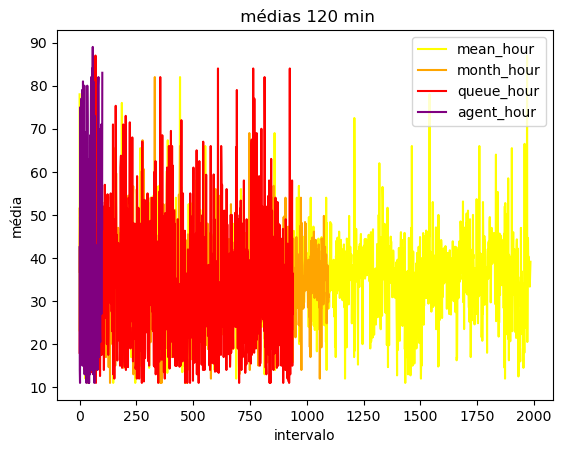

In [41]:
plt.plot(df_to_ml['mean'], color = 'yellow', label = 'mean_hour')
plt.plot(df_to_ml2['mean'], color = 'orange', label = 'month_hour')
plt.plot(df_to_ml3['mean'], color = 'red', label = 'queue_hour')
plt.plot(df_to_ml4['mean'], color = 'purple', label = 'agent_hour')
plt.title(' médias 120 min')
plt.xlabel('intervalo')
plt.ylabel('média')
plt.legend()
plt.show()

/opt/homebrew/anaconda3/envs/machine-learning/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


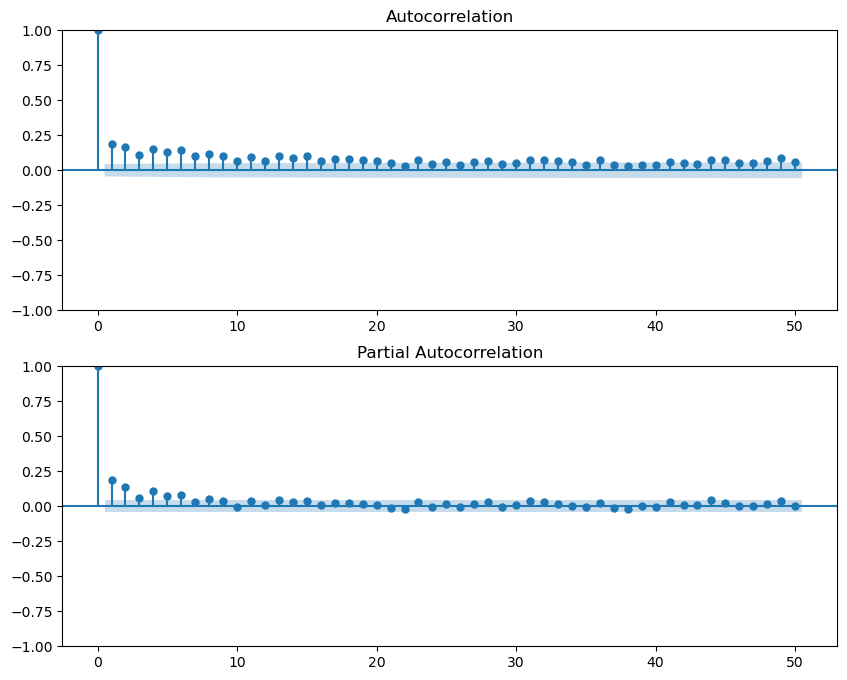

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF and PACF
fig, ax = plt.subplots(2, figsize=(10, 8))
plot_acf(df_to_ml['mean'], ax=ax[0], lags=50)
plot_pacf(df_to_ml['mean'], ax=ax[1], lags=50)
plt.show()

In [44]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df_hw_cut = pd.DataFrame()
# Fit Holt-Winters method with additive seasonality
model_add = ExponentialSmoothing(df_to_ml['mean'], trend="add", seasonal="add", seasonal_periods=96).fit()
df_hw_cut['HWES1_add'] = ExponentialSmoothing(df_to_ml['mean'], trend="add", seasonal="add", seasonal_periods=96).fit().fittedvalues
df_hw_cut['HWES1_mul'] = ExponentialSmoothing(df_to_ml['mean'], trend="add", seasonal="mul", seasonal_periods=96).fit().fittedvalues
# Fit Holt-Winters method with multiplicative seasonality
model_mul = ExponentialSmoothing(df_to_ml['mean'], trend="add", seasonal="mul", seasonal_periods=96).fit()

# Calculate AIC and BIC for both models
aic_add = model_add.aic
aic_mul = model_mul.aic
bic_add = model_add.bic
bic_mul = model_mul.bic

print("AIC (additive):", aic_add)
print("AIC (multiplicative):", aic_mul)
print("BIC (additive):", bic_add)
print("BIC (multiplicative):", bic_mul)


/opt/homebrew/anaconda3/envs/machine-learning/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


AIC (additive): 8590.786388827859
AIC (multiplicative): 8643.86511936601
BIC (additive): 9150.123808139988
BIC (multiplicative): 9203.202538678139


/opt/homebrew/anaconda3/envs/machine-learning/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


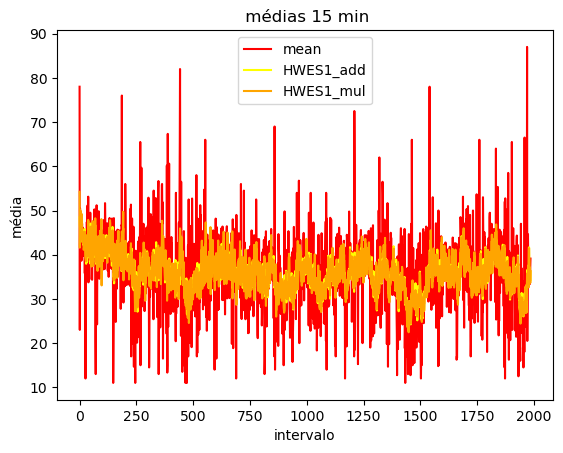

In [45]:
plt.plot(df_to_ml['mean'], color = 'red', label = 'mean')
plt.plot(df_hw_cut['HWES1_add'], color = 'yellow', label = 'HWES1_add')
plt.plot(df_hw_cut['HWES1_mul'], color = 'orange', label = 'HWES1_mul')
plt.title(' médias 15 min')
plt.xlabel('intervalo')
plt.ylabel('média')
plt.legend()
plt.show()